In [24]:
# import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.utils import shuffle
from scipy.stats import gmean

# Load your dataset
df = pd.read_csv('weather.csv')

# Define features (x) and target variable (y)
y = df['weather']
columns_to_drop = ['weather', 'date']
x = df.drop(columns=columns_to_drop, axis=1)

# Shuffle the data (optional but recommended)
x, y = shuffle(x, y, random_state=42)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

# Create SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', random_state=42)

# Train the SVM model
svm_rbf.fit(x_train, y_train)

# Make predictions on the training and testing sets
y_svm_train_pred = svm_rbf.predict(x_train)
y_svm_test_pred = svm_rbf.predict(x_test)

# Calculate accuracy
svm_train_accuracy = accuracy_score(y_train, y_svm_train_pred)
svm_test_accuracy = accuracy_score(y_test, y_svm_test_pred)

# Calculate confusion matrix
cm_train_svm = confusion_matrix(y_train, y_svm_train_pred)
cm_test_svm = confusion_matrix(y_test, y_svm_test_pred)

# Calculate precision, recall, F1-score
precision_train_svm = precision_score(y_train, y_svm_train_pred, average='weighted', zero_division=1)
precision_test_svm = precision_score(y_test, y_svm_test_pred, average='weighted', zero_division=1)

recall_train_svm = recall_score(y_train, y_svm_train_pred, average='weighted', zero_division=1)
recall_test_svm = recall_score(y_test, y_svm_test_pred, average='weighted', zero_division=1)

f1_train_svm = f1_score(y_train, y_svm_train_pred, average='weighted', zero_division=1)
f1_test_svm = f1_score(y_test, y_svm_test_pred, average='weighted', zero_division=1)

# Calculate gmean
gmean_train_svm = gmean([recall_train_svm, precision_train_svm])
gmean_test_svm = gmean([recall_test_svm, precision_test_svm])

# Print results
print(f'Training Accuracy: {svm_train_accuracy:.4f}')
print(f'Test Accuracy: {svm_test_accuracy:.4f}')

print(f'Training Precision: {precision_train_svm:.4f}')
print(f'Test Precision: {precision_test_svm:.4f}')

print(f'Training Recall: {recall_train_svm:.4f}')
print(f'Test Recall: {recall_test_svm:.4f}')

print(f'Training F1 Score: {f1_train_svm:.4f}')
print(f'Test F1 Score: {f1_test_svm:.4f}')

print(f'Training G-Mean: {gmean_train_svm:.4f}')
print(f'Test G-Mean: {gmean_test_svm:.4f}')


Training Accuracy: 0.7748
Test Accuracy: 0.7952
Training Precision: 0.8258
Test Precision: 0.8282
Training Recall: 0.7748
Test Recall: 0.7952
Training F1 Score: 0.7255
Test F1 Score: 0.7512
Training G-Mean: 0.7999
Test G-Mean: 0.8116


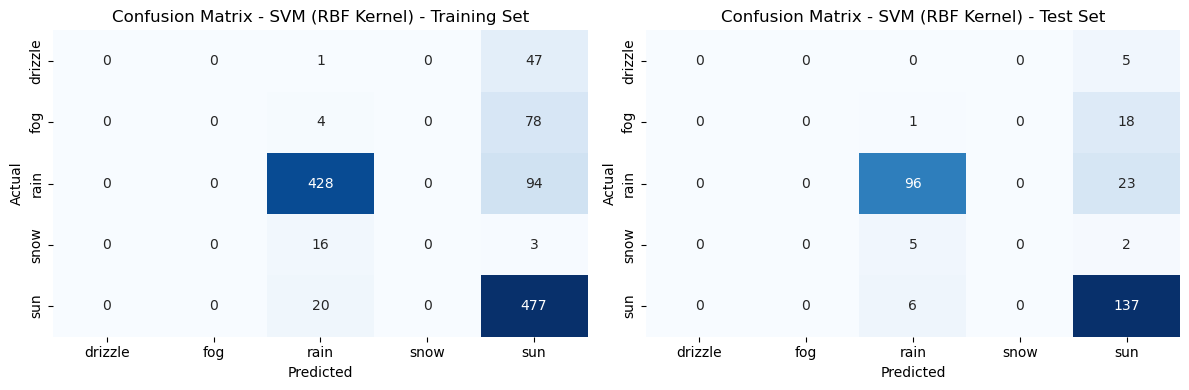

In [18]:
# from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix for training set
cm_train_svm = confusion_matrix(y_train, y_svm_train_pred)

# Create confusion matrix for test set
cm_test_svm = confusion_matrix(y_test, y_svm_test_pred)

# Plot confusion matrices
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.heatmap(cm_train_svm, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=svm_rbf.classes_, yticklabels=svm_rbf.classes_)
plt.title('Confusion Matrix - SVM (RBF Kernel) - Training Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(cm_test_svm, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=svm_rbf.classes_, yticklabels=svm_rbf.classes_)
plt.title('Confusion Matrix - SVM (RBF Kernel) - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()
